In [3]:
%pylab inline 
#conda install matplotlib==1.5.1

Populating the interactive namespace from numpy and matplotlib


In [20]:
a = np.array([[1,2],[3,4],[5,6]])
print a
x=size(a)
print x

[[1 2]
 [3 4]
 [5 6]]
6


In [39]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import barstrength as strng
import kapparot as krot
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

vector = ('00','01','03')

aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = aa[:,2]

snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    fo =open('/home/ornela/python/barra/barpos_time2.dat','a')

    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    #aexp = snap['subhalo_0'+ str('%s' %vector[i])+ '/Time'].value

    pstr = snap['subhalo_000/Str/Coordinates'].value
    masa_str = snap['subhalo_000/Str/Masses'].value
    vel  = snap['subhalo_000/Str/Velocities'].value

    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    t = tiempo.conv(z, h, omega_lambda, omega_matter)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

    #print aexp[isnap]

#----------------------masas----------------------------
    masa_str = masa_str/h

    r200 = r200*aexp[isnap]/h

    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((masa_str[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    M90 = Mc_str[noventa]                

#-------------------------------------------------------------------            
    corte1,=np.where(r<r90[-1])
    corte2,=np.where(r<2*r50[-1])
    veloc,=np.where(r<r50[-1])

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,2*r50[-1])

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    A2max, rmax, phi = strng.a2max(masa_str[corte2], xn[corte2], yn[corte2], 20)

    phi = phi*180./pi

    if phi < 0:
        phi2= phi+360
    else: 
        phi2= phi
    phi2 = phi2/2.

    #print phi2

    fo.write(str('%03d'%isnap) +'\t'+
             str('%.6f'% t) +'\t'+
             str('%12.6f'% A2max) +'\t'+
             str('%12.6f'% rmax) +'\t'+
             str('%12.6f'% phi2) +'\n')
    fo.close()


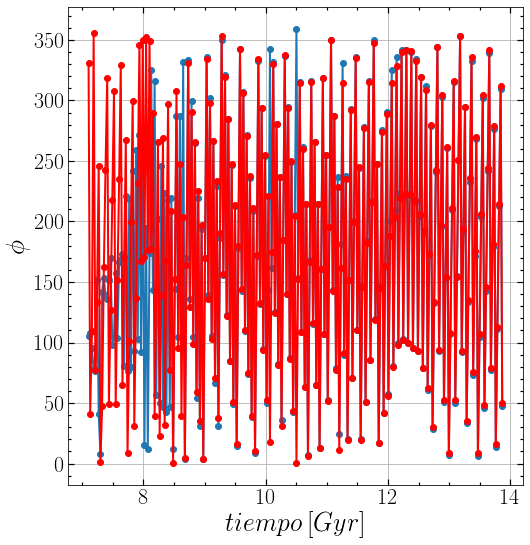

In [80]:
import matplotlib.pyplot as plt
import time_conversion as tiempo
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

#aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
#aexp = aa[:,2]

cm=np.loadtxt('/home/ornela/python/barra/barpos_time.dat')
cm1=np.loadtxt('/home/ornela/python/barra/barpos_time2.dat')
#cm=np.loadtxt('/home/ornela/python/barra/barra_pos.dat')
phi =cm[:,4]
time = cm[:,1]
#phi = phi[1:]
#print len(phi)

phi1 =cm1[:,4]
time1 = cm1[:,1]


# aexp = aexp[::-1]
# aexp = aexp[0:len(phi)]
# #aexp = aexp[0:141]
# z = a0/aexp - 1.
# time = tiempo.conv(z, h, omega_lambda, omega_matter)
mask, = np.where(time>7.1)            
                    
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax3=fig.add_subplot(111)
ax3.plot(time[mask],phi[mask],'o-', lw=2)
ax3.plot(time1[mask],phi1[mask],'ro-', lw=2)
#ax3.set_xlim(8.2,8.9)
plt.grid(True)
#ax3.set_ylim(90,115)
ax3.minorticks_on()
ax3.tick_params( labelsize=22)
ax3.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax3.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')  
plt.xlabel(r'$tiempo\:[Gyr]$', fontsize=26)
plt.ylabel(r'$\phi$',fontsize=26)


plt.show()

[  -202.39490523   9650.21792528 -63139.4030412 ]


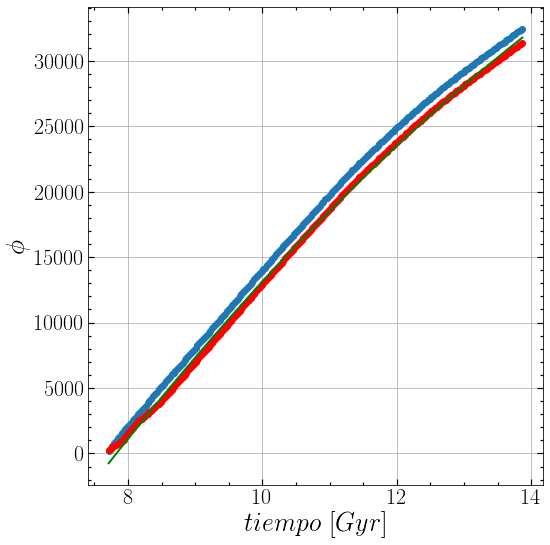

In [62]:
import matplotlib.pyplot as plt
from scipy.interpolate import *
import time_conversion as tiempo
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

#atime = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
#aexp = atime[:,2]

#cm=np.loadtxt('/home/ornela/python/barra/barra_pos.dat')
cm=np.loadtxt('/home/ornela/python/barra/barpos_time.dat')
phi =cm[:,4]
time = cm[:,1]

cm1=np.loadtxt('/home/ornela/python/barra/barpos_time2.dat')
phi1 =cm1[:,4]
time1 = cm1[:,1]

# aexp = aexp[::-1]
# aexp = aexp[0:len(phi)]
# z = a0/aexp - 1.
# time = tiempo.conv(z, h, omega_lambda, omega_matter)

mask, = np.where(time>7.71)

phi=phi[mask]
time=time[mask]

phi1=phi1[mask]
time1=time1[mask]

aa = len(phi)-1
k = 1
phi2 = np.zeros(len(phi))
phi2[-1] = phi[-1]
for i in range(aa,0,-1):
    aux = phi[i]-phi[i-1]
    if aux > 0:
        phi2[i-1] = phi[i-1]+360*k
        k += 1
    else:
        phi2[i-1] = phi[i-1]+360*(k-1)
        
aa = len(phi1)-1
k = 1
phi21 = np.zeros(len(phi1))
phi21[-1] = phi1[-1]
for i in range(aa,0,-1):
    aux = phi1[i]-phi1[i-1]
    if aux > 0:
        phi21[i-1] = phi1[i-1]+360*k
        k += 1
    else:
        phi21[i-1] = phi1[i-1]+360*(k-1)
        
# for i in range(aa,-1,-1):
# aux = phi[i+1]-phi[i]
# print aux

p1 = polyfit(time,phi21,2)
print p1
 
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax3=fig.add_subplot(111)
ax3.plot(time,phi2,'o', lw=2)
ax3.plot(time1,phi21,'ro', lw=2)
ax3.plot(time[mask],polyval(p1,time[mask]), 'g-', lw=2)
#ax3.set_xlim(7.6,8)
#ax3.set_ylim(0,3000)
plt.grid(True)
#ax3.set_ylim(90,115)
ax3.minorticks_on()
ax3.tick_params( labelsize=22)
ax3.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax3.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')  
plt.xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)
plt.ylabel(r'$\phi$',fontsize=26)


plt.show()


In [29]:
ss = p1[0]*2*13.8+p1[1]
print ss, ss/360
print 2*pi*ss/360

3903.65810862 10.8434947462
68.1316868676


[  -75.16232894  5851.90360519]


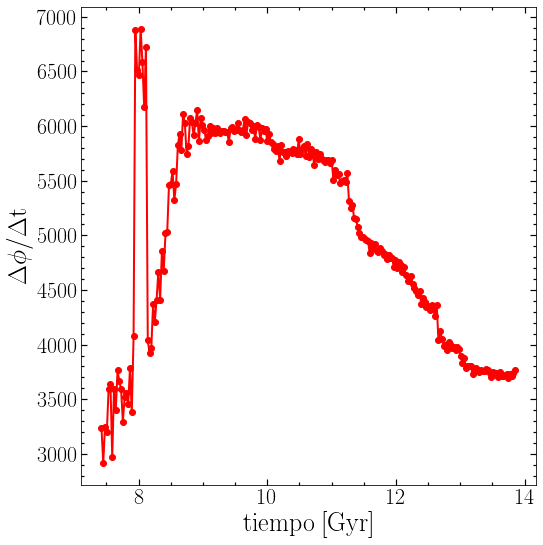

In [13]:
import matplotlib.pyplot as plt
from scipy.interpolate import *
import time_conversion as tiempo
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True



h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

# atime = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
# aexp = atime[:,2]

#cm=np.loadtxt('/home/ornela/python/barra/barra_pos.dat')
# cm=np.loadtxt('/home/ornela/python/barra/barpos_time.dat')
# phi =cm[:,4]
# time =cm[:,1]

cm1=np.loadtxt('/home/ornela/python/barra/barpos_time2.dat')
phi1 =cm1[0:240,4]
time1 =cm1[0:240,1]


# mask, = np.where(time>5)

# phi=phi[mask]
# time=time[mask]

# phi1=phi1[mask]
# time1=time1[mask]

# #phi = phi[1:]
# #phi = phi[1:194]
# aexp = aexp[::-1]
# aexp = aexp[0:len(phi)]
# z = a0/aexp - 1.
# time = tiempo.conv(z, h, omega_lambda, omega_matter)
# #print time

# aa = len(phi)-1
# k = 1
# phi2 = np.zeros(len(phi))
# phi2[-1] = phi[-1]

# delta_phi = np.zeros(len(phi))
# delta_t = np.zeros(len(phi))
# tt = np.zeros(len(phi))

# for i in range(aa,0,-1):
#     aux = phi[i]-phi[i-1]
#     if aux > 0:
#         phi2[i-1] = phi[i-1]+360*k
#         k += 1
#     else:
#         phi2[i-1] = phi[i-1]+360*(k-1)
    
#     delta_t [i] = time[i-1]-time[i]
#     delta_phi[i] = phi2[i-1]-phi2[i]
#     tt[i] = (time[i-1]+time[i])/2.

# delta_t = delta_t[1:]
# delta_phi = delta_phi[1:]
# tt = tt[1:]

# veloc = delta_phi/delta_t
#-------------------------------------------
aa = len(phi1)-1
k = 1
phi21 = np.zeros(len(phi1))
phi21[-1] = phi1[-1]

delta_phi1 = np.zeros(len(phi1))
delta_t1 = np.zeros(len(phi1))
tt1 = np.zeros(len(phi1))

for i in range(aa,0,-1):
    aux = phi1[i]-phi1[i-1]
    if aux > 0:
        phi21[i-1] = phi1[i-1]+360*k
        k += 1
    else:
        phi21[i-1] = phi1[i-1]+360*(k-1)
    
    delta_t1 [i] = time1[i-1]-time1[i]
    delta_phi1[i] = phi21[i-1]-phi21[i]
    tt1[i] = (time1[i-1]+time1[i])/2.

delta_t1 = delta_t1[1:]
delta_phi1 = delta_phi1[1:]
tt1 = tt1[1:]

veloc1 = delta_phi1/delta_t1


#mask, = np.where(time>7.71)

p2 = polyfit(tt,veloc,1)
print p2

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax3=fig.add_subplot(111)
#ax3.plot(tt,veloc,'o-', lw=2)
ax3.plot(tt1,veloc1,'ro-', lw=2)
#ax3.plot(tt,polyval(p2,tt), 'r-', lw=2)
#ax3.set_xlim(7.5,14)
#ax3.set_ylim(2000,7500)
#plt.grid(True)
#ax3.set_ylim(90,115)
ax3.minorticks_on()
ax3.tick_params( labelsize=22)
ax3.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax3.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')

plt.xlabel(r'$\mathrm{tiempo\:[Gyr]}$', fontsize=26)
plt.ylabel(r'$\mathrm{\Delta \phi/\Delta t}$',fontsize=26)
#ax3.twinx() #me hace un eje del otro lado
#ax3.axis('square') #hace el plot cuadrado
#ax3.set_axisbelow(True)


plt.show()


In [69]:
# from matplotlib import rc
# #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('font',**{'family':'serif','monospace':['Computer Modern Typewriter']})

# rc('text', usetex=True)

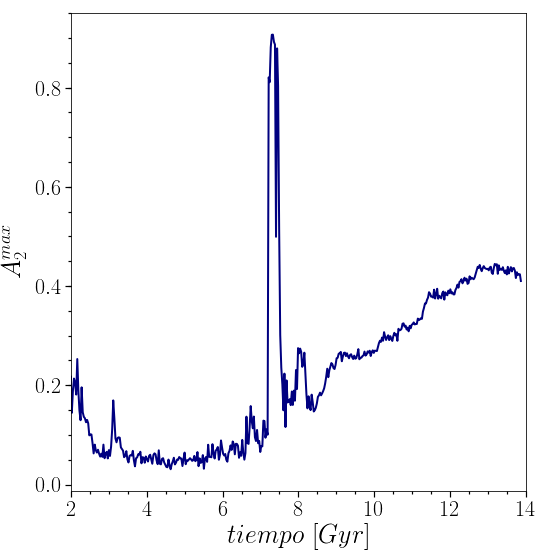

In [78]:
import matplotlib.pyplot as plt

cm=np.loadtxt('/home/ornela/python/barra/barpos_time2.dat')

t  =cm[:,1]
A2max =cm[:,2]

time =[]
A2=[]
aux=range(0,len(t),1)
for j in aux:
    time.append(t[j])
    A2.append(A2max[j])

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax3=fig.add_subplot(111)
ax3.plot(time,A2,'-', lw=2, color='navy')
ax3.set_xlim(2,14)
#ax3.set_ylim(0.04,0.45)
ax3.minorticks_on()
ax3.tick_params( labelsize=22)
ax3.tick_params('both', length=3, width=1.2,which='minor')
ax3.tick_params('both', length=6, width=1.2,which='major')  
plt.xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)
plt.ylabel(r'$A_{2}^{max}$',fontsize=26)


plt.show()

In [93]:
180+176.468481


356.468481

In [76]:
#from matplotlib.patches import Ellipsoid
?ellipsoid

#Ellipse((0,0), 3, 1.5, angle=47.85, fill=False, edgecolor='k', lw=2)

Object `ellipsoid` not found.


In [23]:
from vpython import *
v1 = vector(0,0,0)
pp = ellipsoid(pos=v1, length=3, height=1.5, width=1)
#?ellipsoid.

In [22]:
pp.

<bound method type.incrObjCnt of <class 'vpython.vpython.ellipsoid'>>

In [5]:
x = np.array([2,3,4,5,6,7,8,9,10])
print x[0:3]

[2 3 4]
